# Dataset Summary Analysis

This notebook provides high-level summary analysis for each dataset in the Complete Journey package. Use this as your starting point to understand the data characteristics, distributions, and key insights for each dataset.

> **🎯 Objective**
>
> Provide practical, high-level insights into each dataset to help you understand what the data contains and how it can be used for analysis.

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from completejourney_py import get_data
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Load all datasets
print("Loading Complete Journey datasets...")
data = get_data()
print(f"✅ Loaded {len(data)} datasets successfully!")

# Quick overview
print("\n📊 Dataset Overview:")
for name, df in data.items():
    size_category = "🔴 Large" if len(df) > 1000000 else "🟡 Medium" if len(df) > 10000 else "🟢 Small"
    print(f"   {name}: {len(df):,} records [{size_category}]")

Loading Complete Journey datasets...
✅ Loaded 8 datasets successfully!

📊 Dataset Overview:
   campaign_descriptions: 27 records [🟢 Small]
   coupons: 116,204 records [🟡 Medium]
   promotions: 20,940,529 records [🔴 Large]
   campaigns: 6,589 records [🟢 Small]
   demographics: 801 records [🟢 Small]
   transactions: 1,469,307 records [🔴 Large]
   coupon_redemptions: 2,102 records [🟢 Small]
   products: 92,331 records [🟡 Medium]


## 1. Transactions Analysis

The core dataset containing all purchase transactions. Let's understand shopping behavior, spending patterns, and transaction characteristics.

In [2]:
# Load transactions for analysis
transactions = data['transactions']

print("🛒 TRANSACTIONS SUMMARY ANALYSIS")
print("=" * 50)

# Basic statistics
print(f"📈 Key Metrics:")
print(f"   Total transactions: {len(transactions):,}")
print(f"   Unique households: {transactions['household_id'].nunique():,}")
print(f"   Unique products: {transactions['product_id'].nunique():,}")
print(f"   Unique stores: {transactions['store_id'].nunique():,}")
print(f"   Unique shopping trips: {transactions['basket_id'].nunique():,}")

# Time coverage
date_range = transactions['transaction_timestamp'].dt.date
print(f"\n📅 Time Coverage:")
print(f"   Date range: {date_range.min()} to {date_range.max()}")
print(f"   Total days: {(date_range.max() - date_range.min()).days + 1}")
print(f"   Week range: Week {transactions['week'].min()} to {transactions['week'].max()}")

# Financial summary
print(f"\n💰 Financial Overview:")
print(f"   Total sales value: ${transactions['sales_value'].sum():,.2f}")
print(f"   Average transaction: ${transactions['sales_value'].mean():.2f}")
print(f"   Median transaction: ${transactions['sales_value'].median():.2f}")
print(f"   Total retail discounts: ${transactions['retail_disc'].sum():,.2f}")
print(f"   Total coupon discounts: ${transactions['coupon_disc'].sum():,.2f}")

🛒 TRANSACTIONS SUMMARY ANALYSIS
📈 Key Metrics:
   Total transactions: 1,469,307
   Unique households: 2,469
   Unique products: 68,509
   Unique stores: 457
   Unique shopping trips: 155,848

📅 Time Coverage:
   Date range: 2017-01-01 to 2018-01-01
   Total days: 366
   Week range: Week 1 to 53

💰 Financial Overview:
   Total sales value: $4,596,039.58
   Average transaction: $3.13
   Median transaction: $2.00
   Total retail discounts: $791,650.64
   Total coupon discounts: $26,359.90


In [3]:
# Shopping behavior analysis
print("\n🛍️ Shopping Behavior Analysis:")

# Basket analysis
basket_summary = transactions.groupby('basket_id').agg({
    'sales_value': 'sum',
    'quantity': 'sum',
    'product_id': 'nunique'
}).rename(columns={'product_id': 'unique_products'})

print(f"   Average basket value: ${basket_summary['sales_value'].mean():.2f}")
print(f"   Median basket value: ${basket_summary['sales_value'].median():.2f}")
print(f"   Average items per basket: {basket_summary['quantity'].mean():.1f}")
print(f"   Average unique products per basket: {basket_summary['unique_products'].mean():.1f}")

# Household shopping frequency
household_trips = transactions.groupby('household_id')['basket_id'].nunique()
household_spending = transactions.groupby('household_id')['sales_value'].sum()

print(f"\n🏠 Household Patterns:")
print(f"   Average shopping trips per household: {household_trips.mean():.1f}")
print(f"   Average spending per household: ${household_spending.mean():.2f}")
print(f"   Most active household: {household_trips.max()} trips")
print(f"   Highest spending household: ${household_spending.max():.2f}")


🛍️ Shopping Behavior Analysis:
   Average basket value: $29.49
   Median basket value: $17.50
   Average items per basket: 981.2
   Average unique products per basket: 9.4

🏠 Household Patterns:
   Average shopping trips per household: 63.1
   Average spending per household: $1861.50
   Most active household: 780 trips
   Highest spending household: $24879.75


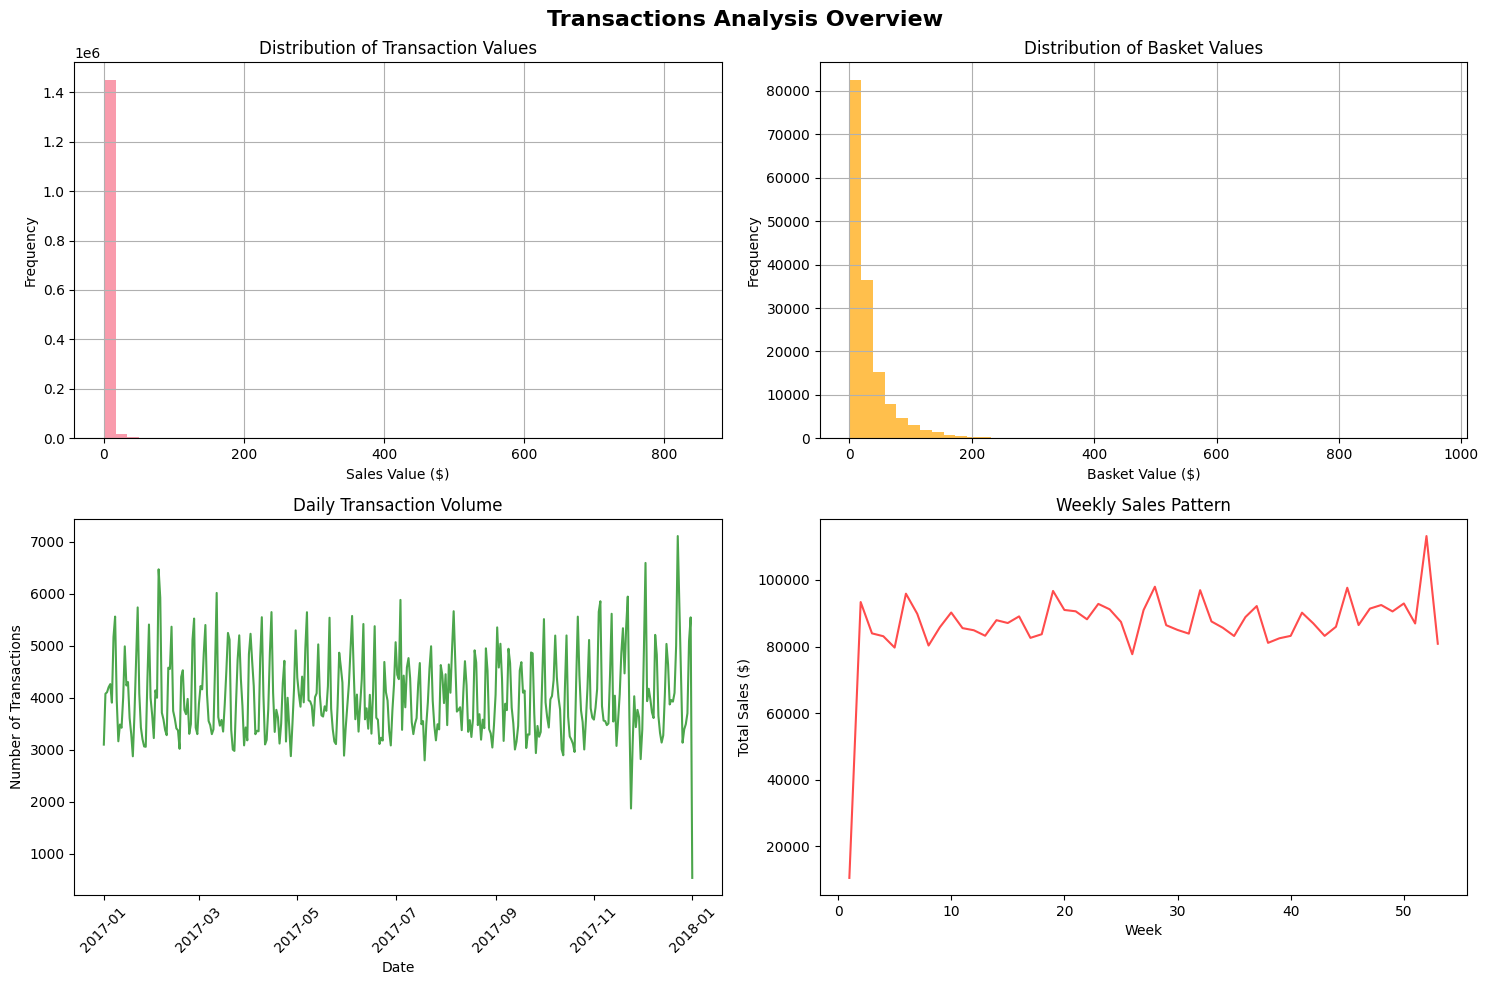

In [4]:
# Transaction visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Transactions Analysis Overview', fontsize=16, fontweight='bold')

# Sales value distribution
transactions['sales_value'].hist(bins=50, ax=axes[0,0], alpha=0.7)
axes[0,0].set_title('Distribution of Transaction Values')
axes[0,0].set_xlabel('Sales Value ($)')
axes[0,0].set_ylabel('Frequency')

# Basket value distribution
basket_summary['sales_value'].hist(bins=50, ax=axes[0,1], alpha=0.7, color='orange')
axes[0,1].set_title('Distribution of Basket Values')
axes[0,1].set_xlabel('Basket Value ($)')
axes[0,1].set_ylabel('Frequency')

# Daily transaction volume
daily_transactions = transactions.groupby(transactions['transaction_timestamp'].dt.date).size()
daily_transactions.plot(ax=axes[1,0], color='green', alpha=0.7)
axes[1,0].set_title('Daily Transaction Volume')
axes[1,0].set_xlabel('Date')
axes[1,0].set_ylabel('Number of Transactions')
axes[1,0].tick_params(axis='x', rotation=45)

# Weekly sales pattern
weekly_sales = transactions.groupby('week')['sales_value'].sum()
weekly_sales.plot(ax=axes[1,1], color='red', alpha=0.7)
axes[1,1].set_title('Weekly Sales Pattern')
axes[1,1].set_xlabel('Week')
axes[1,1].set_ylabel('Total Sales ($)')

plt.tight_layout()
plt.show()

## 2. Demographics Analysis

Understanding the customer base through demographic characteristics and segmentation opportunities.

In [5]:
# Load demographics for analysis
demographics = data['demographics']

print("👥 DEMOGRAPHICS SUMMARY ANALYSIS")
print("=" * 50)

print(f"📊 Dataset Overview:")
print(f"   Total households: {len(demographics):,}")
print(f"   Complete demographic profiles: {demographics.dropna().shape[0]:,}")

# Age analysis
print(f"\n👤 Age Distribution:")
age_dist = demographics['age'].value_counts().sort_index()
for age_group, count in age_dist.items():
    pct = (count / len(demographics)) * 100
    print(f"   {age_group}: {count:,} households ({pct:.1f}%)")

# Income analysis
print(f"\n💰 Income Distribution (Top 8):")
income_dist = demographics['income'].value_counts().head(8)
for income_range, count in income_dist.items():
    pct = (count / len(demographics)) * 100
    print(f"   {income_range}: {count:,} households ({pct:.1f}%)")

# Household composition
print(f"\n🏡 Household Size:")
size_dist = demographics['household_size'].value_counts().sort_index()
for size, count in size_dist.items():
    pct = (count / len(demographics)) * 100
    print(f"   {size} people: {count:,} households ({pct:.1f}%)")

# Kids analysis
print(f"\n👶 Children in Household:")
kids_dist = demographics['kids_count'].value_counts().sort_index()
for kids, count in kids_dist.items():
    pct = (count / len(demographics)) * 100
    print(f"   {kids} children: {count:,} households ({pct:.1f}%)")

👥 DEMOGRAPHICS SUMMARY ANALYSIS
📊 Dataset Overview:
   Total households: 801
   Complete demographic profiles: 488

👤 Age Distribution:
   19-24: 46 households (5.7%)
   25-34: 142 households (17.7%)
   35-44: 194 households (24.2%)
   45-54: 288 households (36.0%)
   55-64: 59 households (7.4%)
   65+: 72 households (9.0%)

💰 Income Distribution (Top 8):
   50-74K: 192 households (24.0%)
   35-49K: 172 households (21.5%)
   75-99K: 96 households (12.0%)
   25-34K: 77 households (9.6%)
   15-24K: 74 households (9.2%)
   Under 15K: 61 households (7.6%)
   125-149K: 38 households (4.7%)
   100-124K: 34 households (4.2%)

🏡 Household Size:
   1 people: 255 households (31.8%)
   2 people: 318 households (39.7%)
   3 people: 109 households (13.6%)
   4 people: 53 households (6.6%)
   5+ people: 66 households (8.2%)

👶 Children in Household:
   0 children: 513 households (64.0%)
   1 children: 159 households (19.9%)
   2 children: 60 households (7.5%)
   3+ children: 69 households (8.6%)


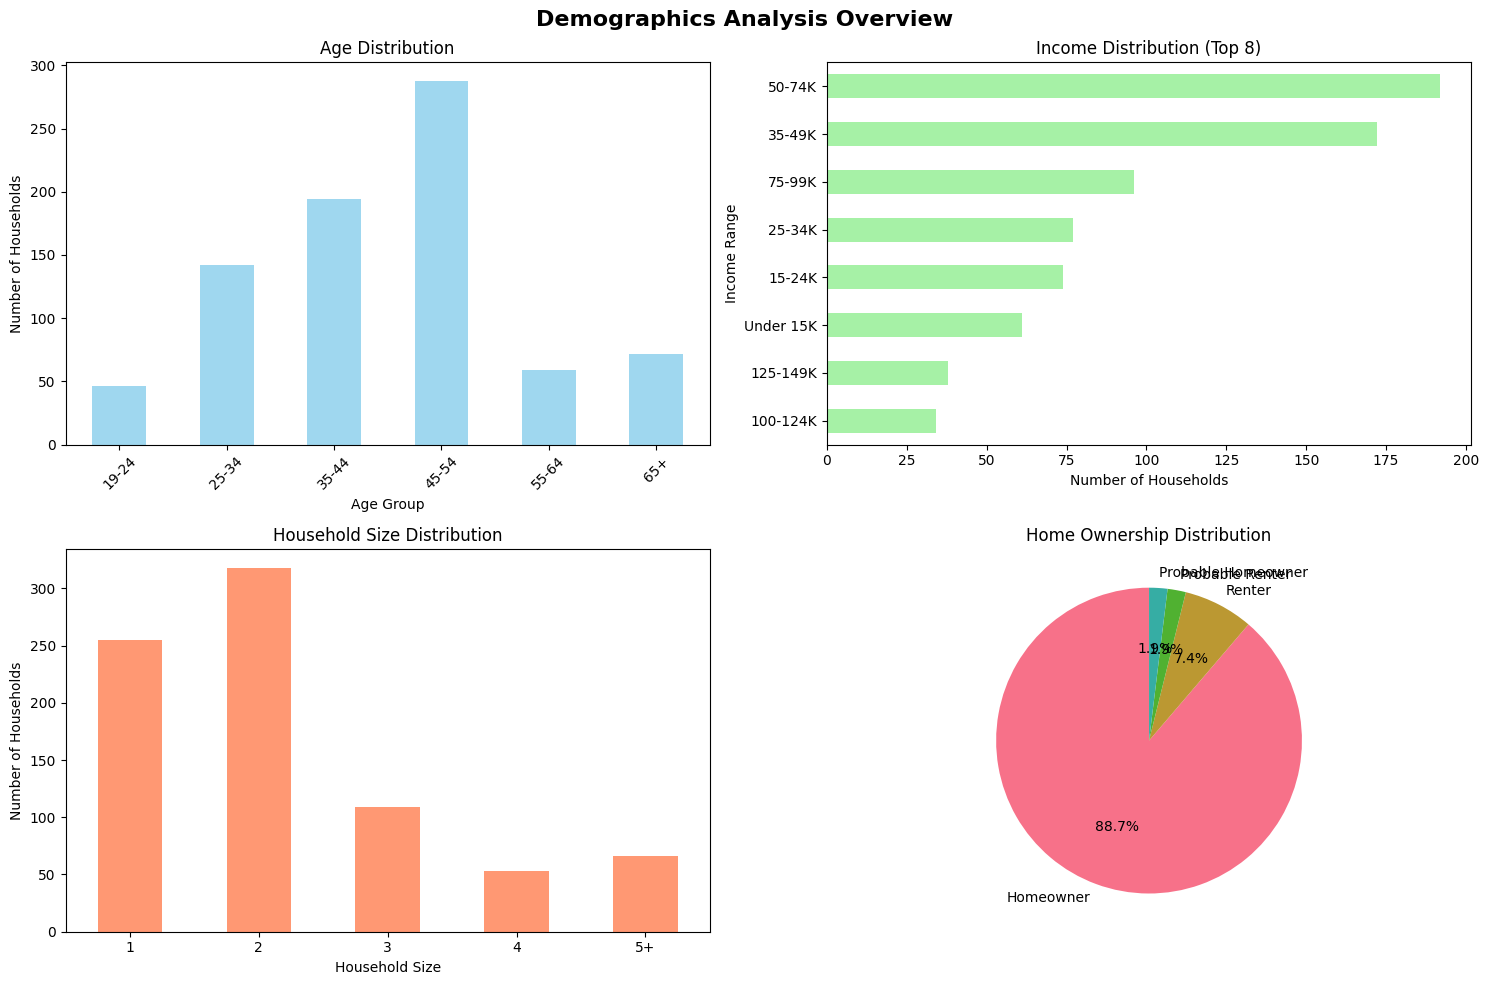

In [6]:
# Demographics visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Demographics Analysis Overview', fontsize=16, fontweight='bold')

# Age distribution
age_dist.plot(kind='bar', ax=axes[0,0], color='skyblue', alpha=0.8)
axes[0,0].set_title('Age Distribution')
axes[0,0].set_xlabel('Age Group')
axes[0,0].set_ylabel('Number of Households')
axes[0,0].tick_params(axis='x', rotation=45)

# Income distribution (top 8)
income_dist.sort_values().plot(kind='barh', ax=axes[0,1], color='lightgreen', alpha=0.8)
axes[0,1].set_title('Income Distribution (Top 8)')
axes[0,1].set_xlabel('Number of Households')
axes[0,1].set_ylabel('Income Range')

# Household size
size_dist.plot(kind='bar', ax=axes[1,0], color='coral', alpha=0.8)
axes[1,0].set_title('Household Size Distribution')
axes[1,0].set_xlabel('Household Size')
axes[1,0].set_ylabel('Number of Households')
axes[1,0].tick_params(axis='x', rotation=0)

# Home ownership (excluding missing)
ownership_dist = demographics['home_ownership'].value_counts(dropna=True)
ownership_dist.plot(kind='pie', ax=axes[1,1], autopct='%1.1f%%', startangle=90)
axes[1,1].set_title('Home Ownership Distribution')
axes[1,1].set_ylabel('')

plt.tight_layout()
plt.show()

## 3. Products Analysis

Understanding the product catalog, departments, brands, and category distribution.

In [7]:
# Load products for analysis
products = data['products']

print("🛍️ PRODUCTS SUMMARY ANALYSIS")
print("=" * 50)

print(f"📦 Product Catalog Overview:")
print(f"   Total products: {len(products):,}")
print(f"   Unique manufacturers: {products['manufacturer_id'].nunique():,}")
print(f"   Departments: {products['department'].nunique()}")
print(f"   Product categories: {products['product_category'].nunique()}")
print(f"   Products with package size info: {products['package_size'].notna().sum():,} ({products['package_size'].notna().mean()*100:.1f}%)")

# Department analysis
print(f"\n🏪 Top 10 Departments by Product Count:")
dept_counts = products['department'].value_counts().head(10)
for dept, count in dept_counts.items():
    pct = (count / len(products)) * 100
    print(f"   {dept}: {count:,} products ({pct:.1f}%)")

# Brand analysis
print(f"\n🏷️ Brand Distribution:")
brand_dist = products['brand'].value_counts()
for brand, count in brand_dist.items():
    pct = (count / len(products)) * 100
    print(f"   {brand}: {count:,} products ({pct:.1f}%)")

# Top categories
print(f"\n📂 Top 10 Product Categories:")
category_counts = products['product_category'].value_counts().head(10)
for category, count in category_counts.items():
    pct = (count / len(products)) * 100
    print(f"   {category}: {count:,} products ({pct:.1f}%)")

🛍️ PRODUCTS SUMMARY ANALYSIS
📦 Product Catalog Overview:
   Total products: 92,331
   Unique manufacturers: 6,471
   Departments: 32
   Product categories: 303
   Products with package size info: 61,745 (66.9%)

🏪 Top 10 Departments by Product Count:
   GROCERY: 39,023 products (42.3%)
   DRUG GM: 31,540 products (34.2%)
   PRODUCE: 3,117 products (3.4%)
   COSMETICS: 3,011 products (3.3%)
   NUTRITION: 2,914 products (3.2%)
   MEAT: 2,542 products (2.8%)
   MEAT-PCKGD: 2,427 products (2.6%)
   DELI: 2,359 products (2.6%)
   PASTRY: 2,149 products (2.3%)
   FLORAL: 938 products (1.0%)

🏷️ Brand Distribution:
   National: 78,516 products (85.0%)
   Private: 13,815 products (15.0%)

📂 Top 10 Product Categories:
   GREETING CARDS/WRAP/PARTY SPLY: 2,785 products (3.0%)
   CANDY - PACKAGED: 2,475 products (2.7%)
   MAKEUP AND TREATMENT: 2,467 products (2.7%)
   HAIR CARE PRODUCTS: 1,744 products (1.9%)
   SOFT DRINKS: 1,704 products (1.8%)
   BAG SNACKS: 1,523 products (1.6%)
   HISPANIC: 1

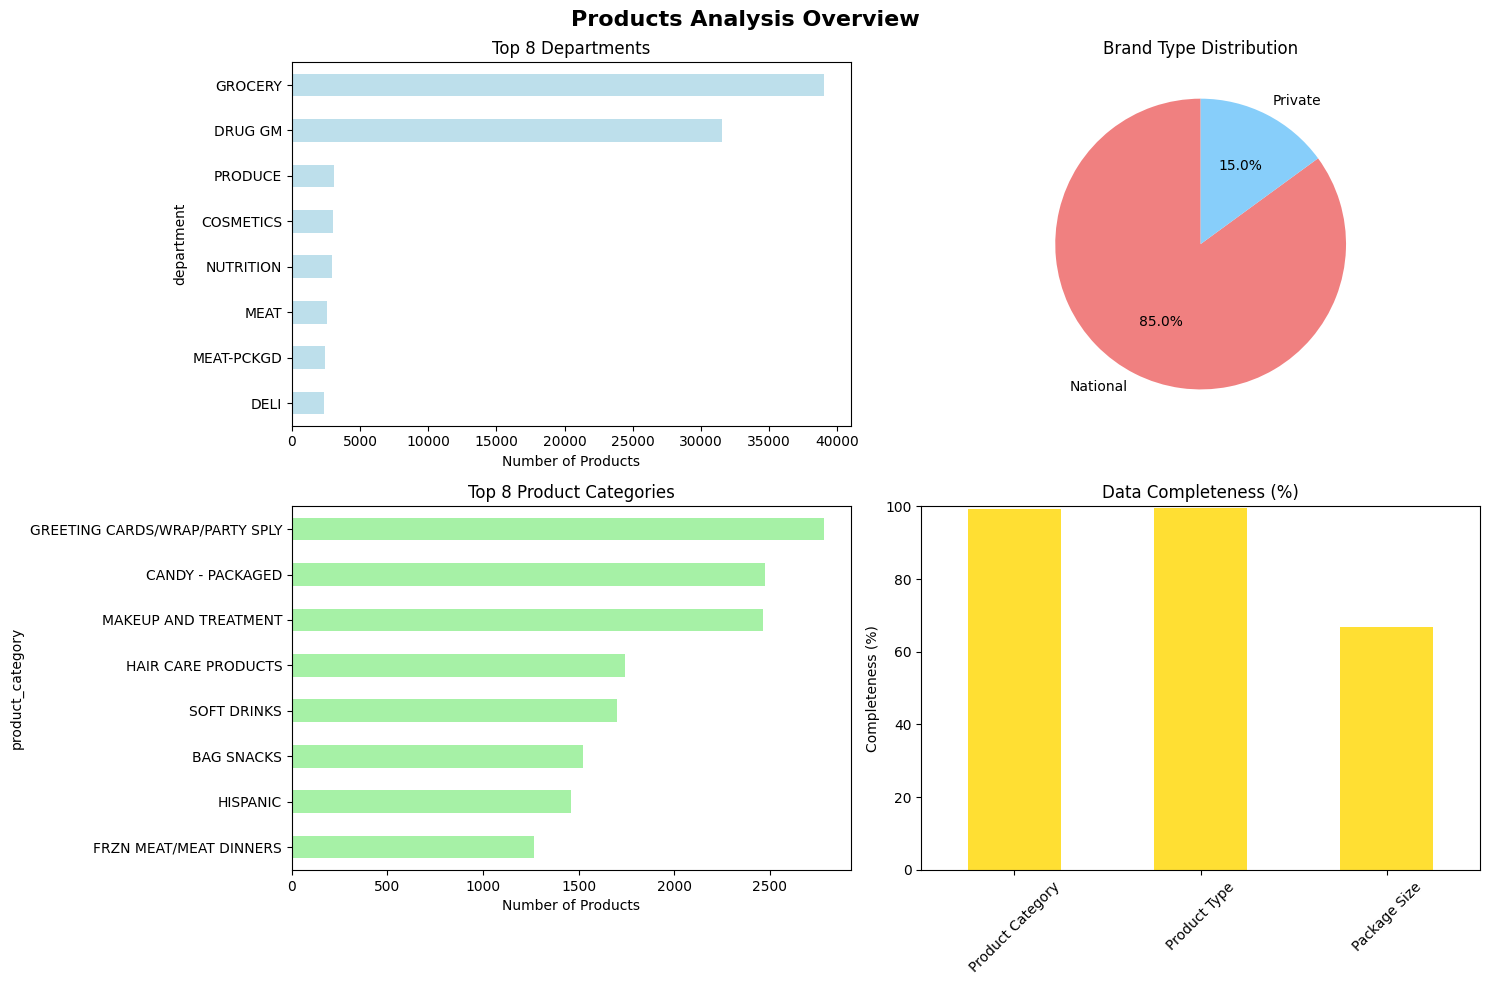

In [8]:
# Products visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Products Analysis Overview', fontsize=16, fontweight='bold')

# Top departments
dept_counts.head(8).sort_values().plot(kind='barh', ax=axes[0,0], color='lightblue', alpha=0.8)
axes[0,0].set_title('Top 8 Departments')
axes[0,0].set_xlabel('Number of Products')

# Brand distribution
brand_dist.plot(kind='pie', ax=axes[0,1], autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightskyblue'])
axes[0,1].set_title('Brand Type Distribution')
axes[0,1].set_ylabel('')

# Top categories
category_counts.head(8).sort_values().plot(kind='barh', ax=axes[1,0], color='lightgreen', alpha=0.8)
axes[1,0].set_title('Top 8 Product Categories')
axes[1,0].set_xlabel('Number of Products')

# Data completeness
completeness_data = {
    'Product Category': products['product_category'].notna().mean() * 100,
    'Product Type': products['product_type'].notna().mean() * 100,
    'Package Size': products['package_size'].notna().mean() * 100
}
pd.Series(completeness_data).plot(kind='bar', ax=axes[1,1], color='gold', alpha=0.8)
axes[1,1].set_title('Data Completeness (%)')
axes[1,1].set_ylabel('Completeness (%)')
axes[1,1].tick_params(axis='x', rotation=45)
axes[1,1].set_ylim(0, 100)

plt.tight_layout()
plt.show()

## 4. Campaigns Analysis

Understanding marketing campaign reach, types, and household participation patterns.

In [9]:
# Load campaign data for analysis
campaigns = data['campaigns']
campaign_descriptions = data['campaign_descriptions']

print("📢 CAMPAIGNS SUMMARY ANALYSIS")
print("=" * 50)

print(f"📊 Campaign Overview:")
print(f"   Total campaign exposures: {len(campaigns):,}")
print(f"   Unique campaigns: {campaigns['campaign_id'].nunique()}")
print(f"   Households reached: {campaigns['household_id'].nunique():,}")
print(f"   Campaign penetration: {campaigns['household_id'].nunique() / len(data['demographics']) * 100:.1f}% of all households")

# Campaign participation patterns
household_campaigns = campaigns['household_id'].value_counts()
print(f"\n🎯 Household Participation:")
print(f"   Average campaigns per household: {household_campaigns.mean():.1f}")
print(f"   Median campaigns per household: {household_campaigns.median():.0f}")
print(f"   Max campaigns for one household: {household_campaigns.max()}")
print(f"   Households with 1 campaign only: {(household_campaigns == 1).sum():,}")
print(f"   Households with 5+ campaigns: {(household_campaigns >= 5).sum():,}")

# Campaign reach analysis
campaign_reach = campaigns['campaign_id'].value_counts().sort_index()
print(f"\n📈 Campaign Reach:")
print(f"   Average households per campaign: {campaign_reach.mean():.0f}")
print(f"   Largest campaign reach: {campaign_reach.max():,} households")
print(f"   Smallest campaign reach: {campaign_reach.min():,} households")

📢 CAMPAIGNS SUMMARY ANALYSIS
📊 Campaign Overview:
   Total campaign exposures: 6,589
   Unique campaigns: 27
   Households reached: 1,559
   Campaign penetration: 194.6% of all households

🎯 Household Participation:
   Average campaigns per household: 4.2
   Median campaigns per household: 4
   Max campaigns for one household: 15
   Households with 1 campaign only: 277
   Households with 5+ campaigns: 630

📈 Campaign Reach:
   Average households per campaign: 244
   Largest campaign reach: 1,133 households
   Smallest campaign reach: 12 households


In [10]:
# Campaign type analysis
print(f"\n🎪 Campaign Types Analysis:")
campaign_types = campaign_descriptions['campaign_type'].value_counts()
for camp_type, count in campaign_types.items():
    pct = (count / len(campaign_descriptions)) * 100
    print(f"   {camp_type}: {count} campaigns ({pct:.1f}%)")

# Join with descriptions for detailed analysis
campaign_analysis = campaigns.merge(campaign_descriptions, on='campaign_id')
type_participation = campaign_analysis.groupby('campaign_type').agg({
    'household_id': 'nunique',
    'campaign_id': 'nunique'
}).rename(columns={'household_id': 'unique_households', 'campaign_id': 'num_campaigns'})

print(f"\n📊 Participation by Campaign Type:")
for camp_type in type_participation.index:
    households = type_participation.loc[camp_type, 'unique_households']
    campaigns_count = type_participation.loc[camp_type, 'num_campaigns']
    avg_reach = households / campaigns_count if campaigns_count > 0 else 0
    print(f"   {camp_type}: {households:,} households across {campaigns_count} campaigns (avg {avg_reach:.0f} households/campaign)")

# Campaign duration analysis
campaign_descriptions['duration_days'] = (campaign_descriptions['end_date'] - campaign_descriptions['start_date']).dt.days
print(f"\n⏰ Campaign Duration:")
print(f"   Average duration: {campaign_descriptions['duration_days'].mean():.1f} days")
print(f"   Shortest campaign: {campaign_descriptions['duration_days'].min()} days")
print(f"   Longest campaign: {campaign_descriptions['duration_days'].max()} days")


🎪 Campaign Types Analysis:
   Type B: 17 campaigns (63.0%)
   Type C: 6 campaigns (22.2%)
   Type A: 4 campaigns (14.8%)

📊 Participation by Campaign Type:
   Type A: 1,490 households across 4 campaigns (avg 372 households/campaign)
   Type B: 995 households across 17 campaigns (avg 59 households/campaign)
   Type C: 397 households across 6 campaigns (avg 66 households/campaign)

⏰ Campaign Duration:
   Average duration: 46.9 days
   Shortest campaign: 32 days
   Longest campaign: 161 days


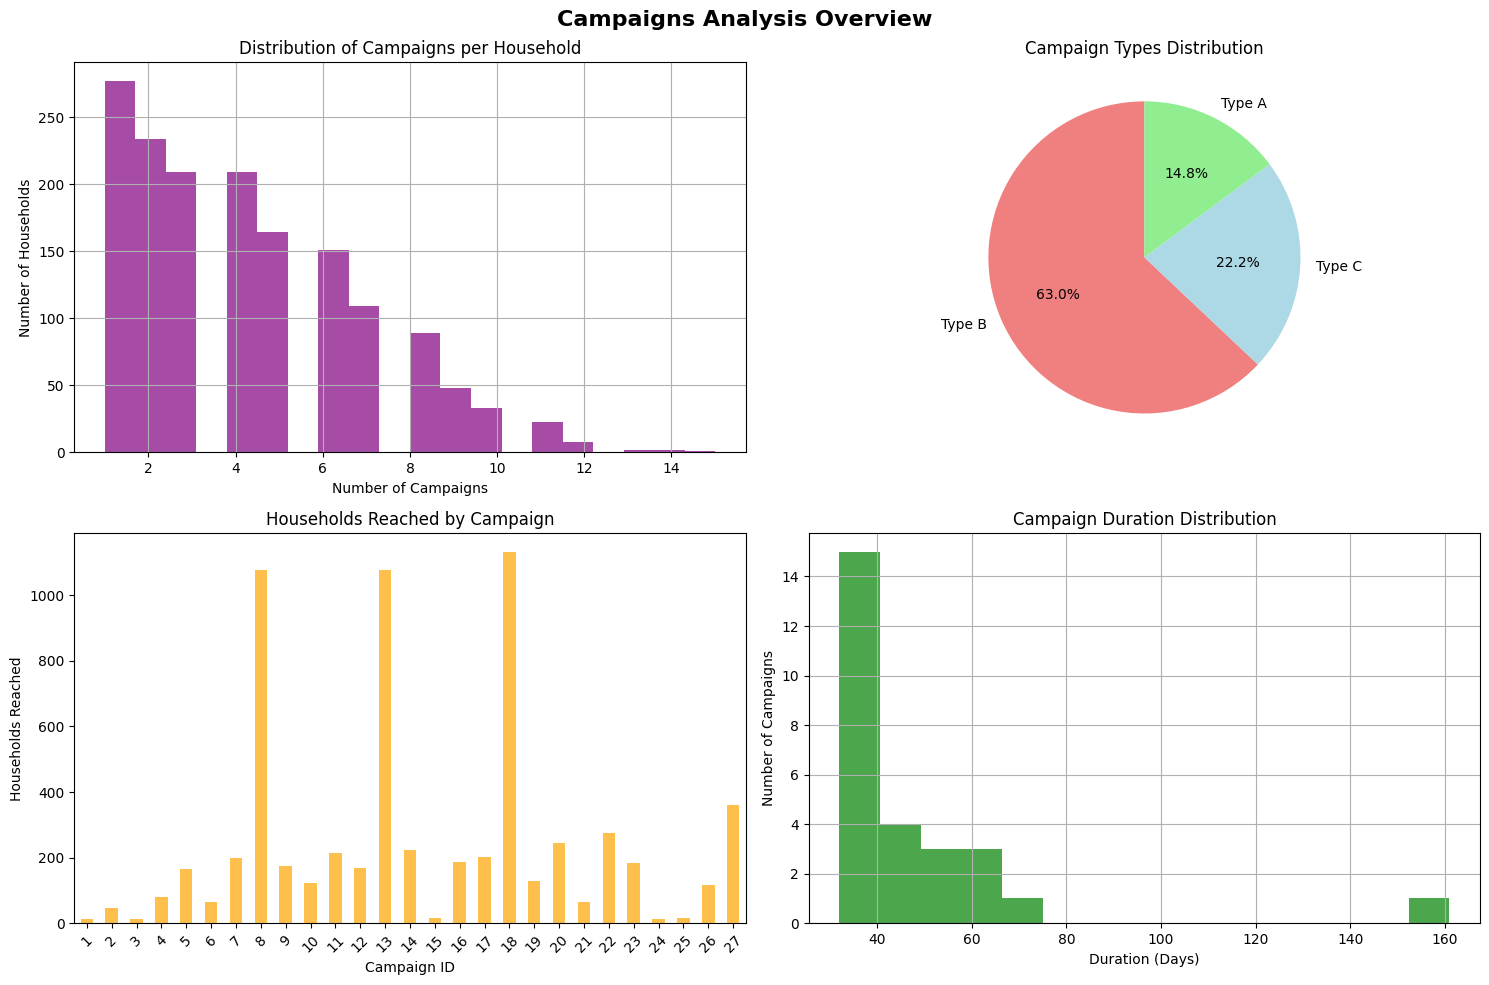

In [11]:
# Campaign visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Campaigns Analysis Overview', fontsize=16, fontweight='bold')

# Campaign participation distribution
household_campaigns.hist(bins=20, ax=axes[0,0], alpha=0.7, color='purple')
axes[0,0].set_title('Distribution of Campaigns per Household')
axes[0,0].set_xlabel('Number of Campaigns')
axes[0,0].set_ylabel('Number of Households')

# Campaign types
campaign_types.plot(kind='pie', ax=axes[0,1], autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightblue', 'lightgreen'])
axes[0,1].set_title('Campaign Types Distribution')
axes[0,1].set_ylabel('')

# Campaign reach distribution
campaign_reach.plot(kind='bar', ax=axes[1,0], alpha=0.7, color='orange')
axes[1,0].set_title('Households Reached by Campaign')
axes[1,0].set_xlabel('Campaign ID')
axes[1,0].set_ylabel('Households Reached')
axes[1,0].tick_params(axis='x', rotation=45)

# Campaign duration distribution
campaign_descriptions['duration_days'].hist(bins=15, ax=axes[1,1], alpha=0.7, color='green')
axes[1,1].set_title('Campaign Duration Distribution')
axes[1,1].set_xlabel('Duration (Days)')
axes[1,1].set_ylabel('Number of Campaigns')

plt.tight_layout()
plt.show()

## 5. Coupons & Redemptions Analysis

Understanding coupon distribution, redemption patterns, and promotional effectiveness.

In [12]:
# Load coupon data for analysis
coupons = data['coupons']
coupon_redemptions = data['coupon_redemptions']

print("🎫 COUPONS & REDEMPTIONS SUMMARY ANALYSIS")
print("=" * 50)

print(f"📊 Coupon Distribution Overview:")
print(f"   Total coupon records: {len(coupons):,}")
print(f"   Unique coupons: {coupons['coupon_upc'].nunique():,}")
print(f"   Products with coupons: {coupons['product_id'].nunique():,}")
print(f"   Campaigns with coupons: {coupons['campaign_id'].nunique()}")

# Products per coupon analysis
products_per_coupon = coupons.groupby('coupon_upc')['product_id'].nunique()
print(f"\n🎯 Coupon Targeting:")
print(f"   Average products per coupon: {products_per_coupon.mean():.1f}")
print(f"   Single-product coupons: {(products_per_coupon == 1).sum():,} ({(products_per_coupon == 1).mean()*100:.1f}%)")
print(f"   Multi-product coupons: {(products_per_coupon > 1).sum():,} ({(products_per_coupon > 1).mean()*100:.1f}%)")
print(f"   Max products for one coupon: {products_per_coupon.max()}")

# Campaign coupon distribution
coupons_per_campaign = coupons.groupby('campaign_id')['coupon_upc'].nunique().sort_values(ascending=False)
print(f"\n📢 Coupons by Campaign:")
print(f"   Average coupons per campaign: {coupons_per_campaign.mean():.0f}")
print(f"   Campaign with most coupons: Campaign {coupons_per_campaign.index[0]} ({coupons_per_campaign.iloc[0]:,} coupons)")
print(f"   Campaign with fewest coupons: Campaign {coupons_per_campaign.index[-1]} ({coupons_per_campaign.iloc[-1]:,} coupons)")

🎫 COUPONS & REDEMPTIONS SUMMARY ANALYSIS
📊 Coupon Distribution Overview:
   Total coupon records: 116,204
   Unique coupons: 981
   Products with coupons: 41,857
   Campaigns with coupons: 27

🎯 Coupon Targeting:
   Average products per coupon: 107.3
   Single-product coupons: 39 (4.0%)
   Multi-product coupons: 942 (96.0%)
   Max products for one coupon: 14477

📢 Coupons by Campaign:
   Average coupons per campaign: 44
   Campaign with most coupons: Campaign 18 (209 coupons)
   Campaign with fewest coupons: Campaign 6 (1 coupons)


In [13]:
# Redemption analysis
print(f"\n💳 Redemption Analysis:")
print(f"   Total redemptions: {len(coupon_redemptions):,}")
print(f"   Unique coupons redeemed: {coupon_redemptions['coupon_upc'].nunique():,}")
print(f"   Households redeeming coupons: {coupon_redemptions['household_id'].nunique():,}")
print(f"   Redemption rate: {coupon_redemptions['household_id'].nunique() / len(data['demographics']) * 100:.1f}% of all households")

# Calculate overall redemption rate
unique_distributed = coupons['coupon_upc'].nunique()
unique_redeemed = coupon_redemptions['coupon_upc'].nunique()
overall_redemption_rate = (unique_redeemed / unique_distributed) * 100
print(f"   Coupon redemption rate: {overall_redemption_rate:.1f}% of distributed coupons")

# Household redemption patterns
household_redemptions = coupon_redemptions['household_id'].value_counts()
print(f"\n🏠 Household Redemption Patterns:")
print(f"   Average redemptions per household: {household_redemptions.mean():.1f}")
print(f"   Max redemptions by one household: {household_redemptions.max()}")
print(f"   Households with 1 redemption: {(household_redemptions == 1).sum():,}")
print(f"   Households with 5+ redemptions: {(household_redemptions >= 5).sum():,}")

# Monthly redemption pattern
coupon_redemptions['month'] = coupon_redemptions['redemption_date'].dt.month
monthly_redemptions = coupon_redemptions['month'].value_counts().sort_index()
print(f"\n📅 Seasonal Redemption Pattern:")
month_names = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
               7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
for month, count in monthly_redemptions.items():
    pct = (count / len(coupon_redemptions)) * 100
    print(f"   {month_names[month]}: {count:,} redemptions ({pct:.1f}%)")


💳 Redemption Analysis:
   Total redemptions: 2,102
   Unique coupons redeemed: 491
   Households redeeming coupons: 410
   Redemption rate: 51.2% of all households
   Coupon redemption rate: 50.1% of distributed coupons

🏠 Household Redemption Patterns:
   Average redemptions per household: 5.1
   Max redemptions by one household: 30
   Households with 1 redemption: 106
   Households with 5+ redemptions: 150

📅 Seasonal Redemption Pattern:
   Jan: 19 redemptions (0.9%)
   Feb: 44 redemptions (2.1%)
   Mar: 32 redemptions (1.5%)
   Apr: 20 redemptions (1.0%)
   May: 268 redemptions (12.7%)
   Jun: 155 redemptions (7.4%)
   Jul: 47 redemptions (2.2%)
   Aug: 424 redemptions (20.2%)
   Sep: 223 redemptions (10.6%)
   Oct: 70 redemptions (3.3%)
   Nov: 526 redemptions (25.0%)
   Dec: 274 redemptions (13.0%)


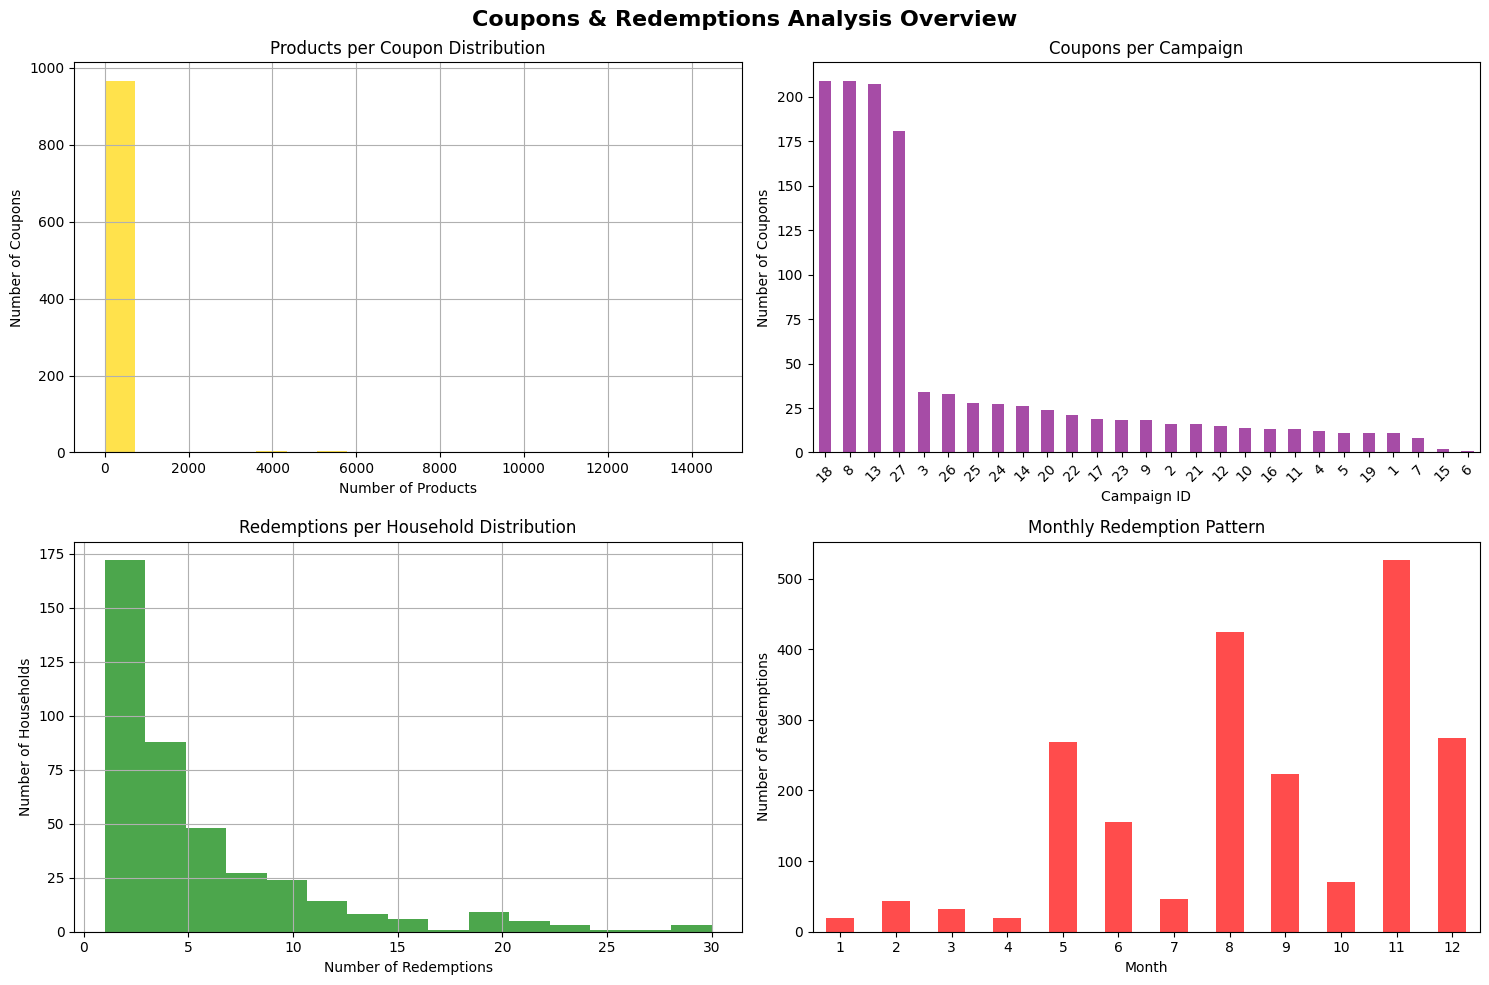

In [14]:
# Coupon visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Coupons & Redemptions Analysis Overview', fontsize=16, fontweight='bold')

# Products per coupon distribution
products_per_coupon.hist(bins=20, ax=axes[0,0], alpha=0.7, color='gold')
axes[0,0].set_title('Products per Coupon Distribution')
axes[0,0].set_xlabel('Number of Products')
axes[0,0].set_ylabel('Number of Coupons')

# Coupons per campaign
coupons_per_campaign.plot(kind='bar', ax=axes[0,1], alpha=0.7, color='purple')
axes[0,1].set_title('Coupons per Campaign')
axes[0,1].set_xlabel('Campaign ID')
axes[0,1].set_ylabel('Number of Coupons')
axes[0,1].tick_params(axis='x', rotation=45)

# Household redemption distribution
household_redemptions.hist(bins=15, ax=axes[1,0], alpha=0.7, color='green')
axes[1,0].set_title('Redemptions per Household Distribution')
axes[1,0].set_xlabel('Number of Redemptions')
axes[1,0].set_ylabel('Number of Households')

# Monthly redemption pattern
monthly_redemptions.plot(kind='bar', ax=axes[1,1], alpha=0.7, color='red')
axes[1,1].set_title('Monthly Redemption Pattern')
axes[1,1].set_xlabel('Month')
axes[1,1].set_ylabel('Number of Redemptions')
axes[1,1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

## 6. Promotions Analysis

Understanding promotional activities, display placements, and mailer strategies.

In [15]:
# Load promotions for analysis (sample due to size)
promotions = data['promotions']

print("🎪 PROMOTIONS SUMMARY ANALYSIS")
print("=" * 50)

print(f"📊 Promotions Overview:")
print(f"   Total promotion records: {len(promotions):,}")
print(f"   Unique products promoted: {promotions['product_id'].nunique():,}")
print(f"   Stores with promotions: {promotions['store_id'].nunique():,}")
print(f"   Weeks covered: {promotions['week'].nunique()} (Week {promotions['week'].min()}-{promotions['week'].max()})")

# Sample analysis (for performance)
promo_sample = promotions.sample(n=min(200000, len(promotions)), random_state=42)
print(f"\n📋 Analyzing sample of {len(promo_sample):,} records for detailed insights...")

# Display location analysis
print(f"\n🏪 Display Locations (Top 10):")
display_dist = promo_sample['display_location'].value_counts().head(10)
for location, count in display_dist.items():
    pct = (count / len(promo_sample)) * 100
    print(f"   {location}: {count:,} promotions ({pct:.1f}%)")

# Mailer location analysis
print(f"\n📮 Mailer Locations (Top 10):")
mailer_dist = promo_sample['mailer_location'].value_counts().head(10)
for location, count in mailer_dist.items():
    pct = (count / len(promo_sample)) * 100
    print(f"   {location}: {count:,} promotions ({pct:.1f}%)")

# Promotional intensity analysis
promotions_per_product = promo_sample.groupby('product_id').size()
print(f"\n🎯 Promotional Intensity:")
print(f"   Average promotions per product: {promotions_per_product.mean():.1f}")
print(f"   Most promoted product: {promotions_per_product.max()} promotions")
print(f"   Products with 1 promotion: {(promotions_per_product == 1).sum():,}")
print(f"   Products with 10+ promotions: {(promotions_per_product >= 10).sum():,}")

🎪 PROMOTIONS SUMMARY ANALYSIS
📊 Promotions Overview:
   Total promotion records: 20,940,529
   Unique products promoted: 59,800
   Stores with promotions: 112
   Weeks covered: 53 (Week 1-53)

📋 Analyzing sample of 200,000 records for detailed insights...

🏪 Display Locations (Top 10):
   0: 114,215 promotions (57.1%)
   9: 14,507 promotions (7.3%)
   5: 13,706 promotions (6.9%)
   7: 13,190 promotions (6.6%)
   3: 11,280 promotions (5.6%)
   2: 10,001 promotions (5.0%)
   6: 9,831 promotions (4.9%)
   1: 6,002 promotions (3.0%)
   A: 3,956 promotions (2.0%)
   4: 3,312 promotions (1.7%)

📮 Mailer Locations (Top 10):
   A: 91,545 promotions (45.8%)
   0: 63,102 promotions (31.6%)
   D: 24,311 promotions (12.2%)
   H: 8,423 promotions (4.2%)
   F: 5,967 promotions (3.0%)
   J: 2,048 promotions (1.0%)
   L: 1,845 promotions (0.9%)
   C: 1,606 promotions (0.8%)
   X: 1,047 promotions (0.5%)
   Z: 102 promotions (0.1%)

🎯 Promotional Intensity:
   Average promotions per product: 6.0
   Mos

In [16]:
# Weekly promotion pattern
weekly_promos = promo_sample.groupby('week').size()
print(f"\n📈 Weekly Promotion Pattern:")
print(f"   Average promotions per week: {weekly_promos.mean():.0f}")
print(f"   Peak week: Week {weekly_promos.idxmax()} ({weekly_promos.max():,} promotions)")
print(f"   Lowest week: Week {weekly_promos.idxmin()} ({weekly_promos.min():,} promotions)")

# Store promotion activity
store_promos = promo_sample.groupby('store_id').size().sort_values(ascending=False)
print(f"\n🏬 Store Promotion Activity:")
print(f"   Average promotions per store: {store_promos.mean():.0f}")
print(f"   Most active store: Store {store_promos.index[0]} ({store_promos.iloc[0]:,} promotions)")
print(f"   Least active store: Store {store_promos.index[-1]} ({store_promos.iloc[-1]:,} promotions)")

# Display vs Mailer analysis
has_display = (promo_sample['display_location'] != '0').sum()
has_mailer = (promo_sample['mailer_location'] != '0').sum()
print(f"\n📊 Promotion Channel Usage:")
print(f"   Records with display placement: {has_display:,} ({has_display/len(promo_sample)*100:.1f}%)")
print(f"   Records with mailer placement: {has_mailer:,} ({has_mailer/len(promo_sample)*100:.1f}%)")


📈 Weekly Promotion Pattern:
   Average promotions per week: 3774
   Peak week: Week 23 (5,677 promotions)
   Lowest week: Week 48 (2,920 promotions)

🏬 Store Promotion Activity:
   Average promotions per store: 1786
   Most active store: Store 369 (2,588 promotions)
   Least active store: Store 34280 (285 promotions)

📊 Promotion Channel Usage:
   Records with display placement: 85,785 (42.9%)
   Records with mailer placement: 136,898 (68.4%)


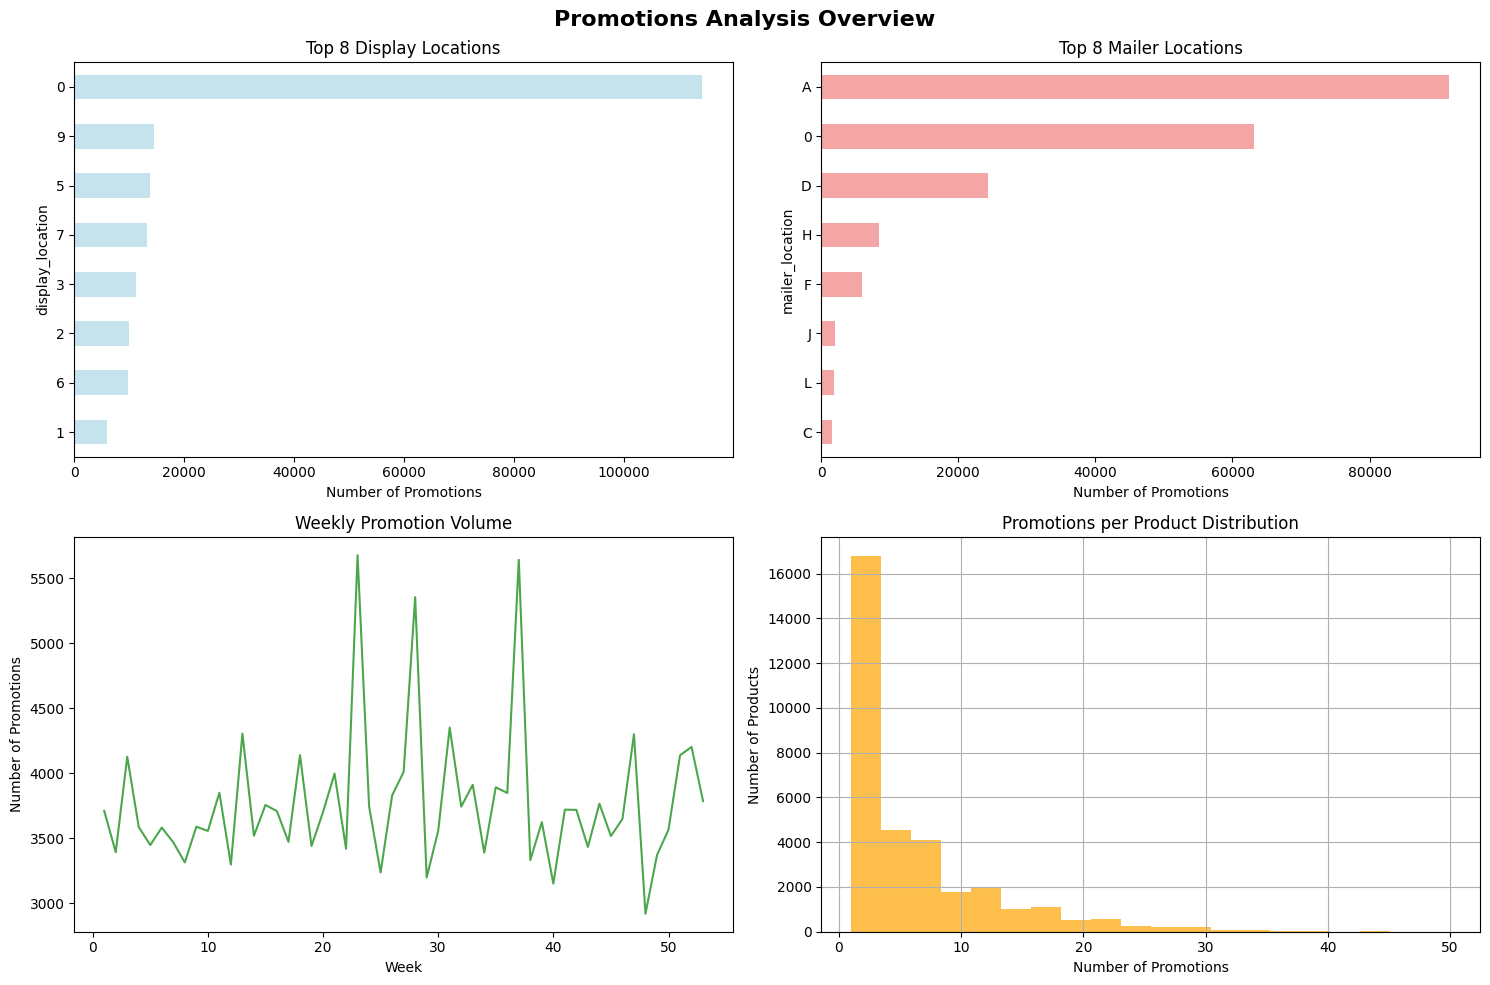

In [17]:
# Promotions visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Promotions Analysis Overview', fontsize=16, fontweight='bold')

# Top display locations
display_dist.head(8).sort_values().plot(kind='barh', ax=axes[0,0], alpha=0.7, color='lightblue')
axes[0,0].set_title('Top 8 Display Locations')
axes[0,0].set_xlabel('Number of Promotions')

# Top mailer locations
mailer_dist.head(8).sort_values().plot(kind='barh', ax=axes[0,1], alpha=0.7, color='lightcoral')
axes[0,1].set_title('Top 8 Mailer Locations')
axes[0,1].set_xlabel('Number of Promotions')

# Weekly promotion pattern
weekly_promos.plot(ax=axes[1,0], alpha=0.7, color='green')
axes[1,0].set_title('Weekly Promotion Volume')
axes[1,0].set_xlabel('Week')
axes[1,0].set_ylabel('Number of Promotions')

# Promotions per product distribution
promotions_per_product.hist(bins=20, ax=axes[1,1], alpha=0.7, color='orange')
axes[1,1].set_title('Promotions per Product Distribution')
axes[1,1].set_xlabel('Number of Promotions')
axes[1,1].set_ylabel('Number of Products')

plt.tight_layout()
plt.show()

## 7. Cross-Dataset Insights

Understanding relationships and patterns across multiple datasets.

In [18]:
print("🔗 CROSS-DATASET INSIGHTS")
print("=" * 50)

# Campaign effectiveness insights
print(f"📈 Campaign vs. Shopping Behavior:")
campaign_households = set(campaigns['household_id'])
transaction_households = set(transactions['household_id'])
campaign_shoppers = campaign_households.intersection(transaction_households)
print(f"   Households in both campaigns and transactions: {len(campaign_shoppers):,}")
print(f"   Campaign participants who shop: {len(campaign_shoppers) / len(campaign_households) * 100:.1f}%")

# Coupon effectiveness
print(f"\n🎫 Coupon vs. Redemption Effectiveness:")
redemption_households = set(coupon_redemptions['household_id'])
coupon_campaign_households = set(campaigns[campaigns['campaign_id'].isin(coupons['campaign_id'])]['household_id'])
coupon_redeemers = redemption_households.intersection(coupon_campaign_households)
print(f"   Households who received coupons: {len(coupon_campaign_households):,}")
print(f"   Households who redeemed coupons: {len(redemption_households):,}")
print(f"   Redemption rate among recipients: {len(coupon_redeemers) / len(coupon_campaign_households) * 100:.1f}%")

# Product popularity vs promotion
print(f"\n🛍️ Product Popularity vs. Promotion:")
# Top selling products
top_selling_products = transactions.groupby('product_id')['sales_value'].sum().sort_values(ascending=False).head(100)
promoted_products = set(promotions['product_id'])
top_selling_promoted = set(top_selling_products.index).intersection(promoted_products)
print(f"   Top 100 selling products that are promoted: {len(top_selling_promoted)}")
print(f"   Promotion rate among top sellers: {len(top_selling_promoted) / 100 * 100:.1f}%")

# Demographics vs spending
print(f"\n👥 Demographics vs. Spending Patterns:")
household_spending = transactions.groupby('household_id')['sales_value'].sum()
demo_spending = demographics.merge(household_spending.reset_index(), on='household_id', how='inner')

# Spending by age group
age_spending = demo_spending.groupby('age')['sales_value'].agg(['mean', 'count']).round(2)
print(f"   Average spending by age group:")
for age_group in age_spending.index:
    avg_spending = age_spending.loc[age_group, 'mean']
    count = age_spending.loc[age_group, 'count']
    print(f"     {age_group}: ${avg_spending:.2f} ({count} households)")

🔗 CROSS-DATASET INSIGHTS
📈 Campaign vs. Shopping Behavior:
   Households in both campaigns and transactions: 1,559
   Campaign participants who shop: 100.0%

🎫 Coupon vs. Redemption Effectiveness:
   Households who received coupons: 1,559
   Households who redeemed coupons: 410
   Redemption rate among recipients: 26.3%

🛍️ Product Popularity vs. Promotion:
   Top 100 selling products that are promoted: 86
   Promotion rate among top sellers: 86.0%

👥 Demographics vs. Spending Patterns:
   Average spending by age group:
     19-24: $2732.02 (46 households)
     25-34: $3192.76 (142 households)
     35-44: $3733.80 (194 households)
     45-54: $3374.38 (288 households)
     55-64: $2934.81 (59 households)
     65+: $2452.79 (72 households)


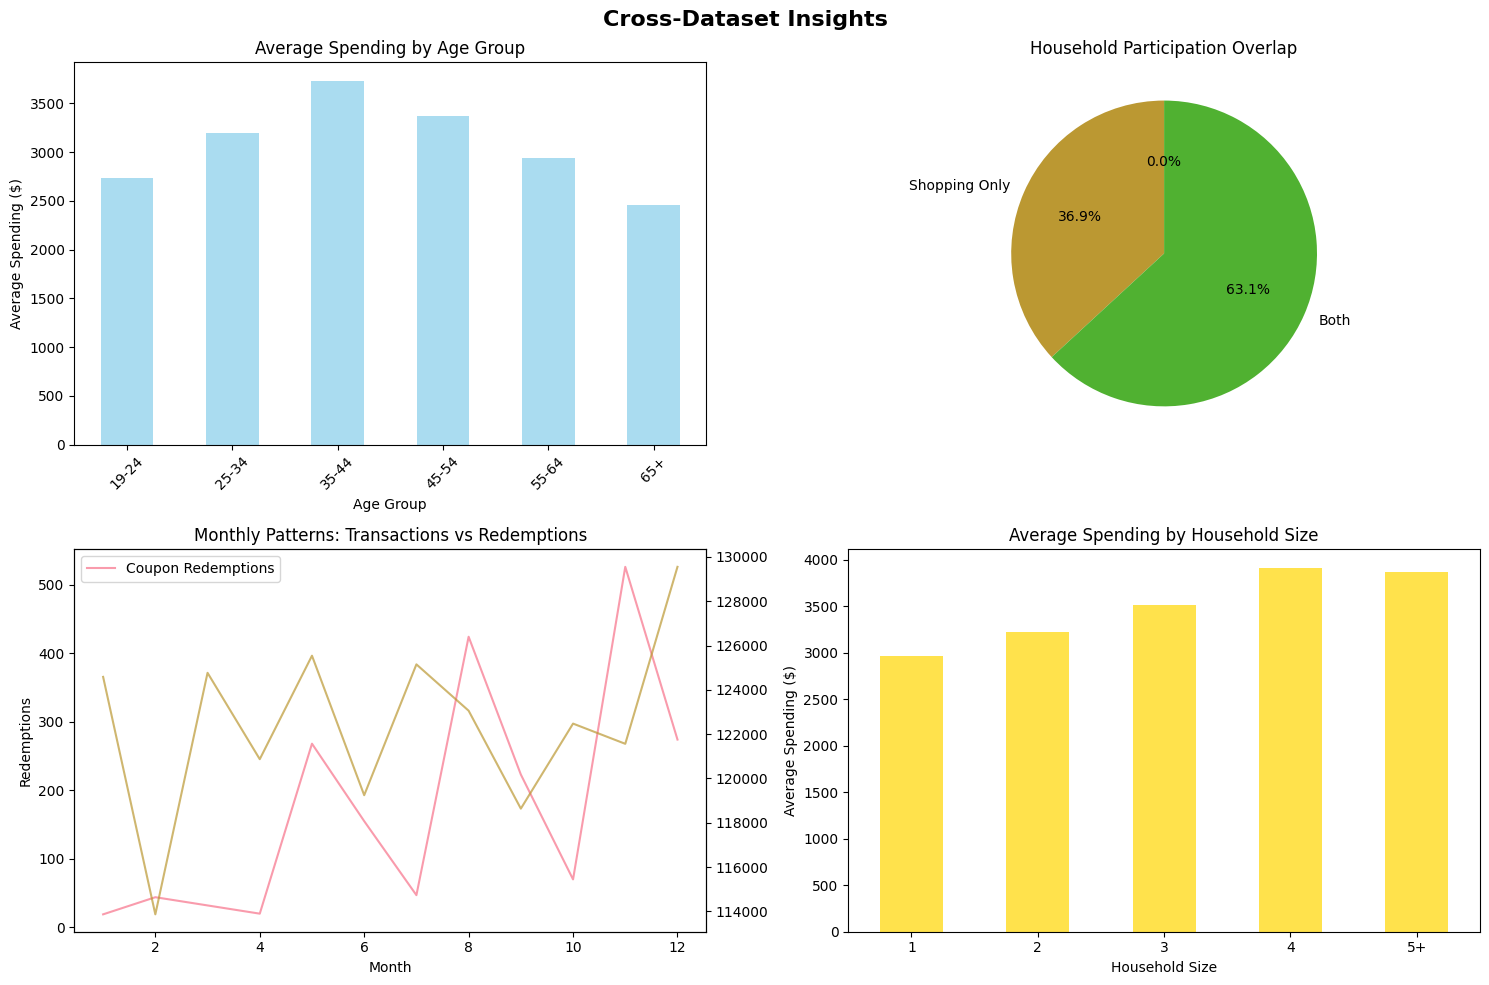

In [19]:
# Cross-dataset visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Cross-Dataset Insights', fontsize=16, fontweight='bold')

# Spending by age group
age_spending['mean'].plot(kind='bar', ax=axes[0,0], alpha=0.7, color='skyblue')
axes[0,0].set_title('Average Spending by Age Group')
axes[0,0].set_xlabel('Age Group')
axes[0,0].set_ylabel('Average Spending ($)')
axes[0,0].tick_params(axis='x', rotation=45)

# Household participation overlap
overlap_data = {
    'Campaign Only': len(campaign_households - transaction_households),
    'Shopping Only': len(transaction_households - campaign_households),
    'Both': len(campaign_shoppers)
}
pd.Series(overlap_data).plot(kind='pie', ax=axes[0,1], autopct='%1.1f%%', startangle=90)
axes[0,1].set_title('Household Participation Overlap')
axes[0,1].set_ylabel('')

# Monthly patterns comparison
monthly_transactions = transactions.groupby(transactions['transaction_timestamp'].dt.month).size()
monthly_redemptions.plot(ax=axes[1,0], label='Coupon Redemptions', alpha=0.7)
monthly_transactions.plot(ax=axes[1,0], label='Transactions', alpha=0.7, secondary_y=True)
axes[1,0].set_title('Monthly Patterns: Transactions vs Redemptions')
axes[1,0].set_xlabel('Month')
axes[1,0].set_ylabel('Redemptions')
axes[1,0].legend(loc='upper left')

# Spending distribution by household size
size_spending = demo_spending.groupby('household_size')['sales_value'].mean().sort_index()
size_spending.plot(kind='bar', ax=axes[1,1], alpha=0.7, color='gold')
axes[1,1].set_title('Average Spending by Household Size')
axes[1,1].set_xlabel('Household Size')
axes[1,1].set_ylabel('Average Spending ($)')
axes[1,1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

## Summary & Key Takeaways

Based on this comprehensive analysis, here are the key insights from the Complete Journey dataset:

In [20]:
print("📋 DATASET SUMMARY & KEY TAKEAWAYS")
print("=" * 50)

print("🔍 Key Dataset Characteristics:")
print(f"   • {len(transactions):,} transactions from {transactions['household_id'].nunique():,} households")
print(f"   • ${transactions['sales_value'].sum():,.0f} total sales value over {(date_range.max() - date_range.min()).days + 1} days")
print(f"   • {len(products):,} products across {products['department'].nunique()} departments")
print(f"   • {len(campaign_descriptions)} marketing campaigns reaching {campaigns['household_id'].nunique():,} households")
print(f"   • {coupon_redemptions['coupon_upc'].nunique():,} unique coupons redeemed from {coupons['coupon_upc'].nunique():,} distributed")

print("\n💡 Business Insights:")
print(f"   • Average household spends ${household_spending.mean():.2f} over the study period")
print(f"   • Average basket value is ${basket_summary['sales_value'].mean():.2f} with {basket_summary['unique_products'].mean():.1f} unique products")
print(f"   • {brand_dist['Private']:,} private label products vs {brand_dist['National']:,} national brand products")
print(f"   • Campaign participation: {len(campaign_households)/len(demographics)*100:.1f}% of households")
print(f"   • Coupon redemption rate: {overall_redemption_rate:.1f}% of distributed coupons")

print("\n📊 Data Quality Notes:")
print(f"   • Complete transaction data with no missing values")
print(f"   • Demographics: {demographics.isnull().sum().sum():,} missing values across {len(demographics):,} households")
print(f"   • Products: {products['package_size'].notna().mean()*100:.1f}% have package size information")
print(f"   • Promotions dataset is large ({len(promotions):,} records) - consider sampling for analysis")

print("\n🎯 Recommended Next Steps:")
print("   • Explore customer segmentation using demographics and spending patterns")
print("   • Analyze market basket relationships between products")
print("   • Measure campaign effectiveness using transaction data")
print("   • Study seasonal patterns in shopping and redemption behavior")
print("   • Investigate product performance across different departments and brands")

📋 DATASET SUMMARY & KEY TAKEAWAYS
🔍 Key Dataset Characteristics:
   • 1,469,307 transactions from 2,469 households
   • $4,596,040 total sales value over 366 days
   • 92,331 products across 32 departments
   • 27 marketing campaigns reaching 1,559 households
   • 491 unique coupons redeemed from 981 distributed

💡 Business Insights:
   • Average household spends $1861.50 over the study period
   • Average basket value is $29.49 with 9.4 unique products
   • 13,815 private label products vs 78,516 national brand products
   • Campaign participation: 194.6% of households
   • Coupon redemption rate: 50.1% of distributed coupons

📊 Data Quality Notes:
   • Complete transaction data with no missing values
   • Demographics: 370 missing values across 801 households
   • Products: 66.9% have package size information
   • Promotions dataset is large (20,940,529 records) - consider sampling for analysis

🎯 Recommended Next Steps:
   • Explore customer segmentation using demographics and spend

## Next Steps

Now that you have a comprehensive understanding of each dataset, explore these specific analysis notebooks:

- **[Top Products Analysis](../top-products/)** - Product performance and ranking analysis
- **[Shopping Frequency Analysis](../shopping-frequency/)** - Customer behavior and visit patterns
- **[Coupon Analysis](../coupon-analysis/)** - Promotional effectiveness and redemption patterns
- **[Traffic Patterns Analysis](../traffic-patterns/)** - Store visit timing and seasonal trends

Or return to:
- **[Dataset Structure Overview](../../user-guide/datasets/)** - Dataset schemas and key variables
- **[Getting Started Guide](../../user-guide/getting-started/)** - Basic package usage